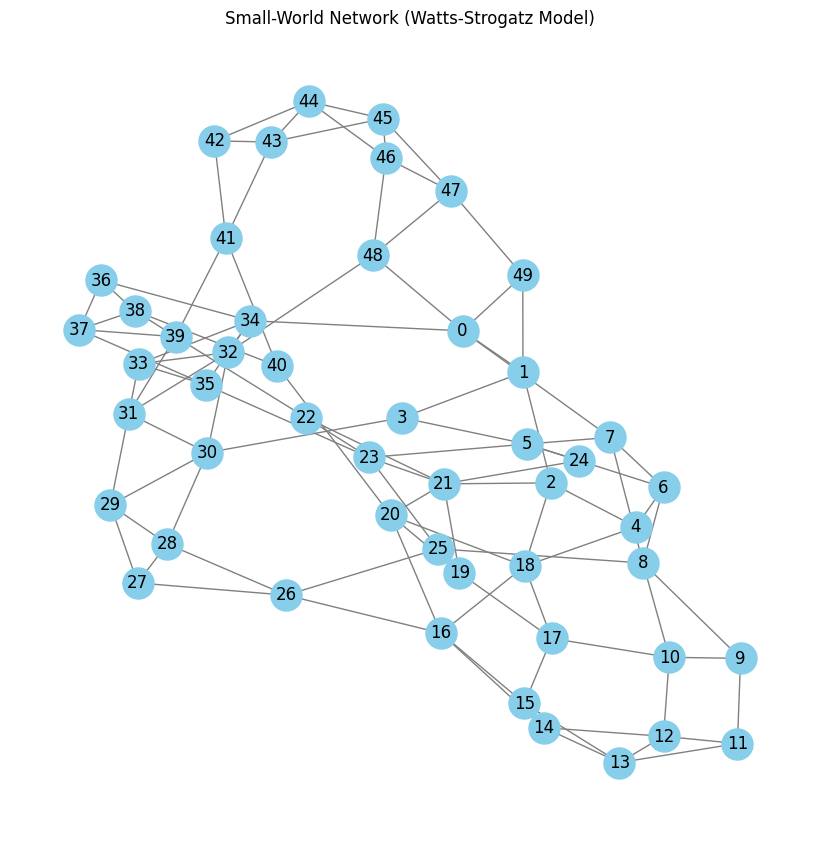

Clustering Coefficient: 0.28
Average Shortest Path Length: 3.51
Adjacency Matrix:
[[0 1 0 ... 0 1 1]
 [1 0 1 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [1 0 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(45)  # Ensures the same randomness for edge rewiring
np.random.seed(45)  # Ensures consistent behavior for numpy-based randomness


# Parameters for the Watts-Strogatz model
n = 50  # Number of nodes
k = 4 # Each node is connected to k nearest neighbors if in a ring
p = 0.1 # The probability of rewiring each edge

#a small-world network using the Watts-Strogatz model
small_world = nx.watts_strogatz_graph(n, k, p)


plt.figure(figsize=(8, 8))
nx.draw(small_world, with_labels=True, node_color="skyblue", node_size=500, edge_color="gray")
plt.title("Small-World Network (Watts-Strogatz Model)")
plt.show()

clustering_coefficient = nx.average_clustering(small_world)
average_shortest_path_length = nx.average_shortest_path_length(small_world)

print(f"Clustering Coefficient: {clustering_coefficient:.2f}")
print(f"Average Shortest Path Length: {average_shortest_path_length:.2f}")


adj_swn = nx.adjacency_matrix(small_world).todense()

print("Adjacency Matrix:")
print(np.array(adj_swn))


In [ ]:
def func(x, y, alpha):
    if x <= 0:
        f1 = (alpha / (1 - x)) + y
        return f1
    
    elif 0< x < alpha + y:
        f2 = alpha + y
        return f2
    
    else:  # x >= alpha + y 
        f3 = -1
        return f3




def step_pulse(I0, I_pulse, t_start, duration, T, n_pulses, interval):
       #Generates a step pulse current array
    #     I0 (float) Initial current
    #     I_pulse (float) Amplitude of the pulse
    #     t_start (int) Start time of the first pulse
    #     duration (int) Duration of each pulse
    #     T (int) Total time steps
    #     n_pulses (int Number of pulses
    #     interval (int) Time between the end of one pulse and the start of the next
    # Returns:
    #     numpy rray of current values over time
    

    t = np.arange(0, T)
    current = np.full_like(t, I0, dtype=float)
    for i in range(n_pulses):
        pulse_start = t_start + i * (duration + interval)
        pulse_end = pulse_start + duration
        current[(t >= pulse_start) & (t <= pulse_end)] = I_pulse
    return current



def coupled_rulkov_curr(N, T, mu, alpha, sigma, coupling_const, adja_matrix, pulse_current, pulse_nodes):
        # Simulating the coupled Rulkov model with step pulse current applied to random nodes
    #N (int): Number of nodes
    #     T (int): Number of time steps
    #     mu, alpha, sigma (float) model parameters.
    #     adja_matrix (numpy.ndarray): Adjacency matrix
    #     I0, I_pulse, t_start, duration, n_pulses, interval (float) pulse parameters
    #     num_pulse_nodes (int): Number of nodes receiving the pulse.
    # Returns: (xlist, ylist): states of nodes over time.
    
    # Initialize 
    x_init = -1.01
    y_init = -3

    xlist = np.zeros((T, N))
    ylist = np.zeros((T, N))

    # Initial all neurons
    xlist[0, :] = x_init
    ylist[0, :] = y_init



    # Time evolution
    for t in range(1, T):
        for i in range(N):
            # Calculate coupling term
            coupling_term = coupling_const * sum(
                adja_matrix[i, j] * (xlist[t-1, j] - xlist[t-1, i]) for j in range(N)
            )

            # Determine if the current pulse applies to this node
            external_current = pulse_current[t] if i == pulse_nodes else 0

            # Update x y
            xlist[t, i] = func(xlist[t-1, i], ylist[t-1, i], alpha) + coupling_term
            ylist[t, i] = ylist[t-1, i] - mu * (xlist[t-1, i] + 1) + mu * (sigma + external_current)

    return xlist, ylist


In [ ]:
T = 30000
N = n
sigma = -0.01
mu  = 0.001
adja_matrix = adj_swn
alpha = 4
# coupling_const = 0.1
I0 = 0
I_pulse = 1
t_start = 0
duration = T
n_pulses = 1
interval = 0
num_pulse_nodes = 1





pulse_current = step_pulse(I0, I_pulse, t_start, duration, T, n_pulses, interval)
pulse_nodes = 25




0


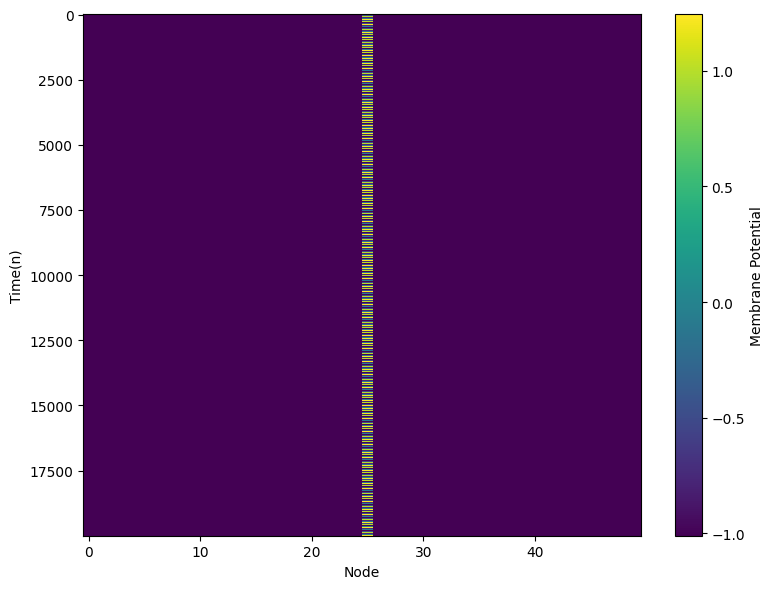

0.001


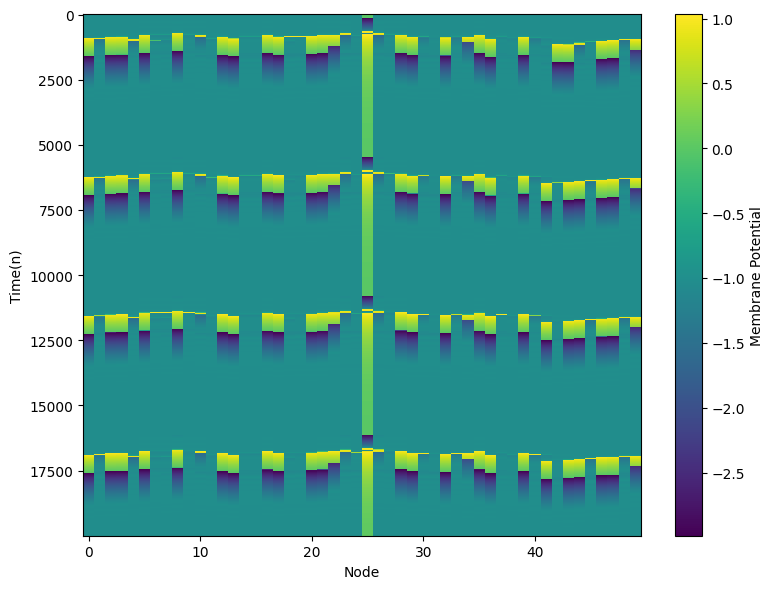

0.002


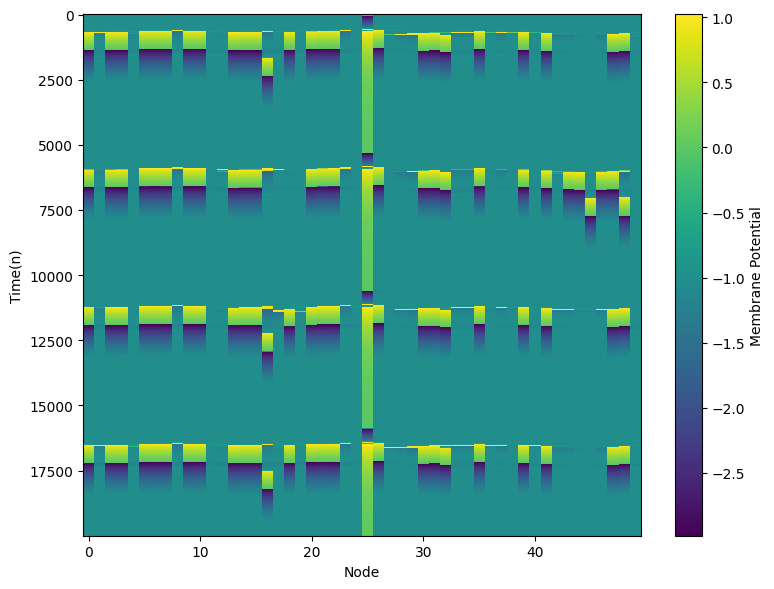

0.003


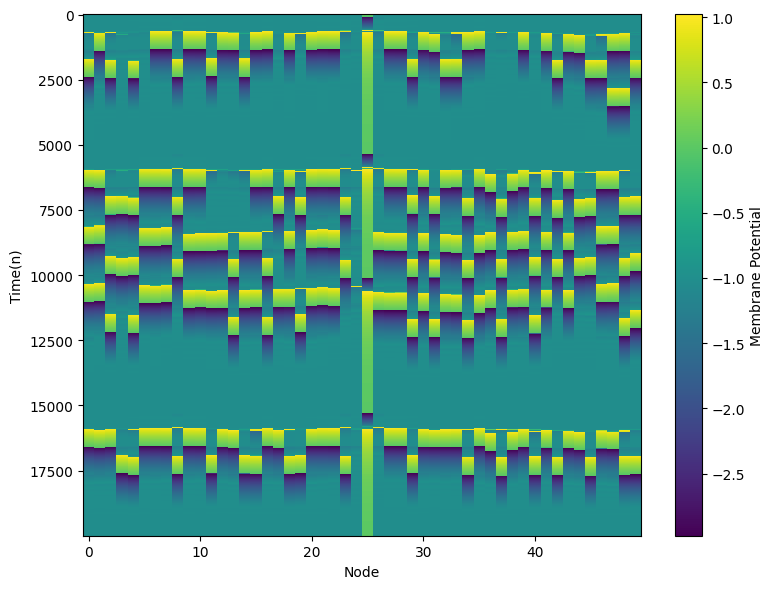

0.004


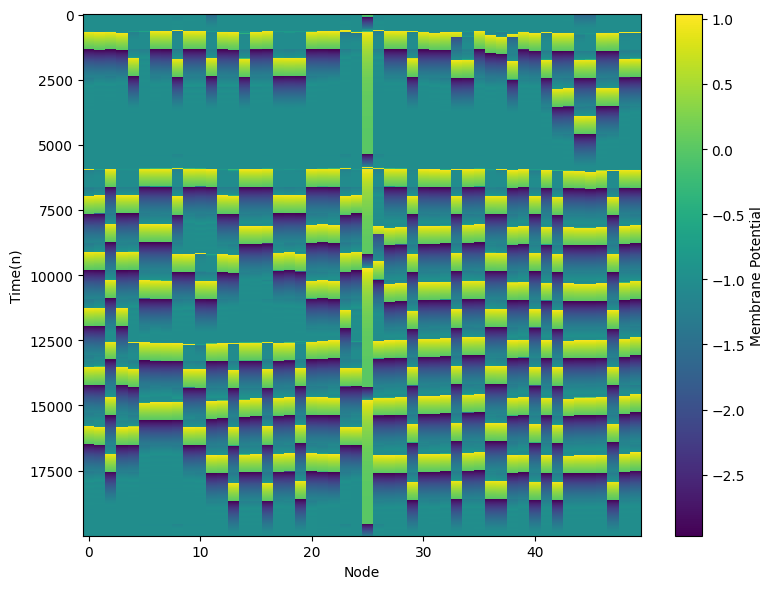

0.005


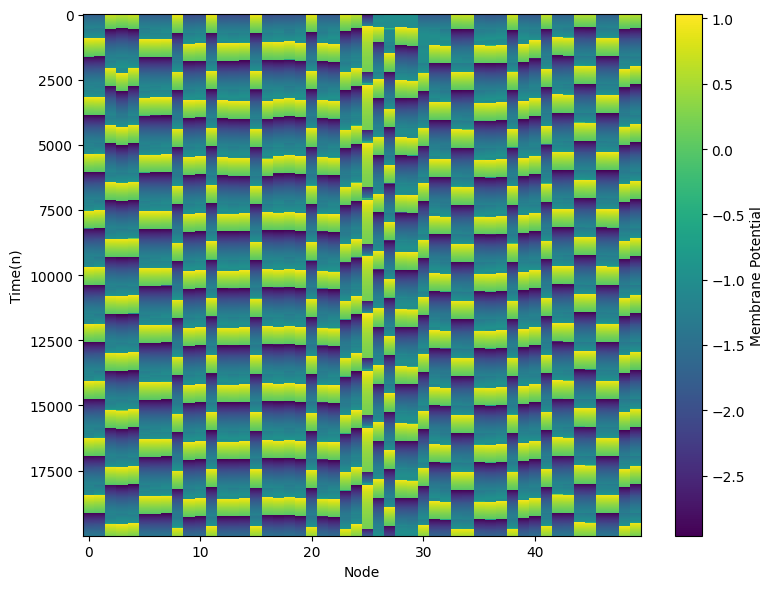

0.006


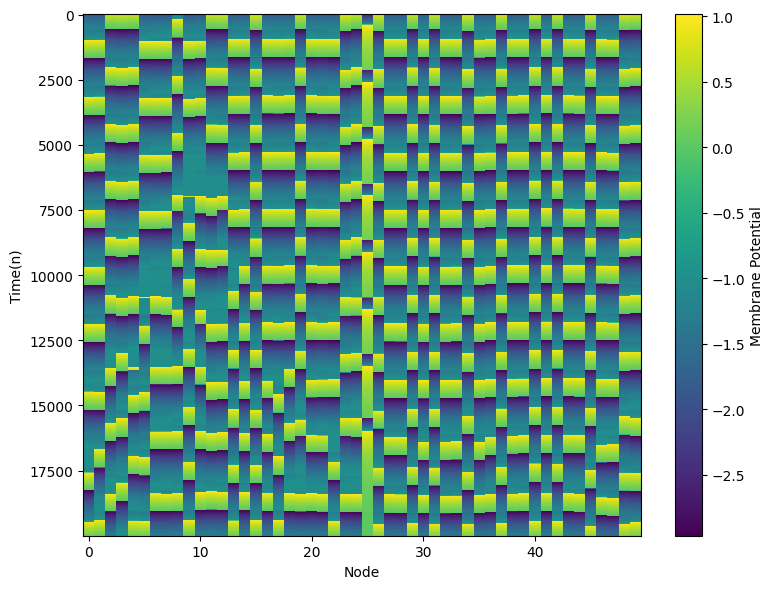

0.007


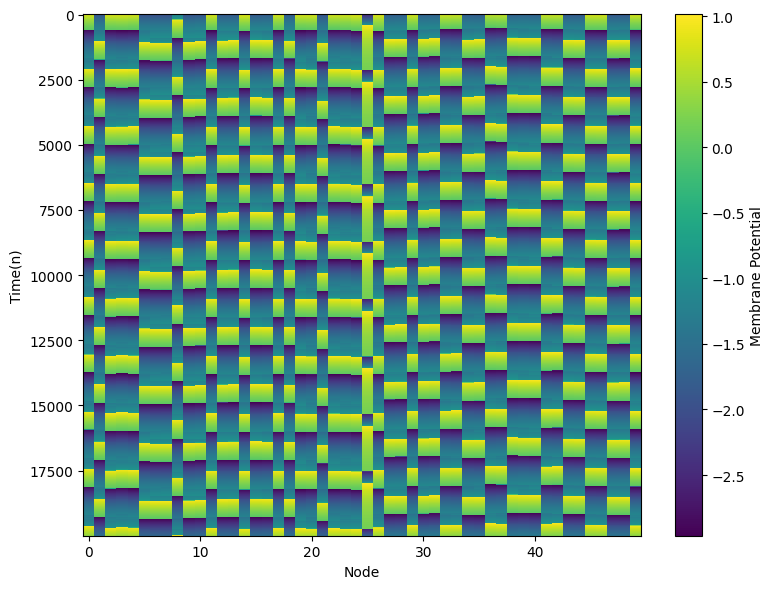

0.008


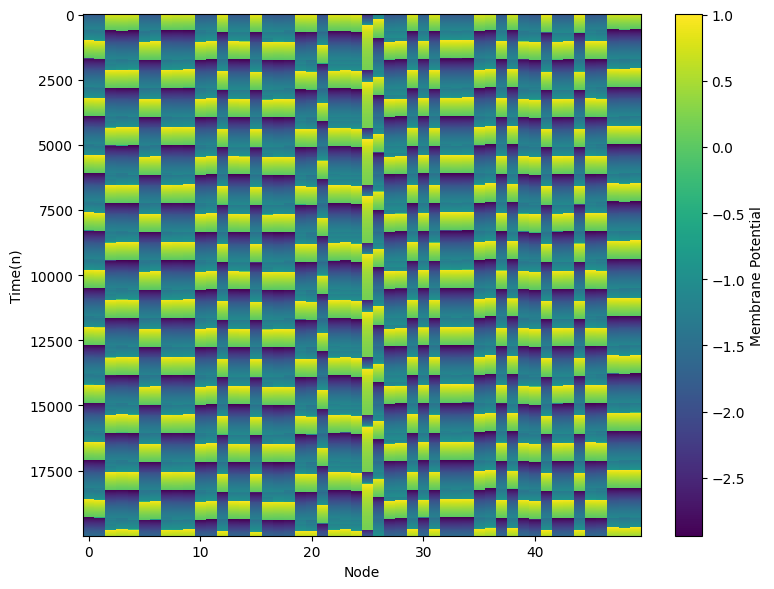

0.009


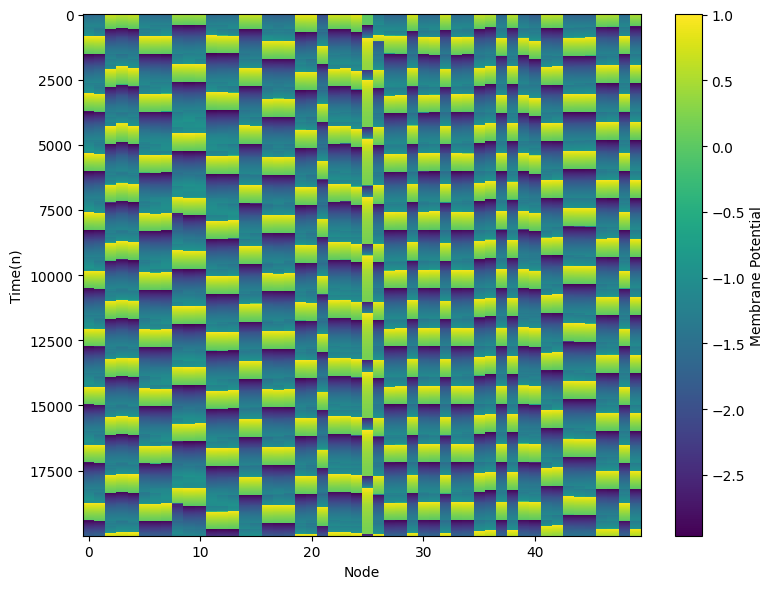

0.01


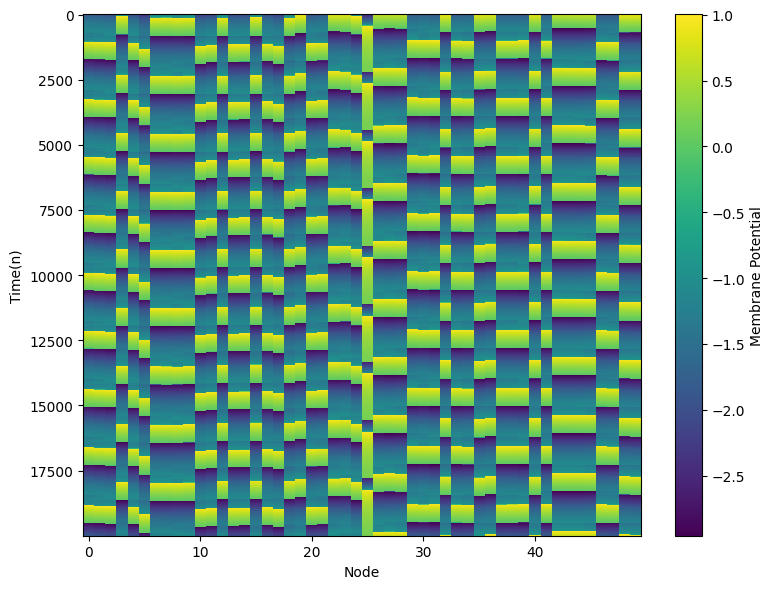

0.02


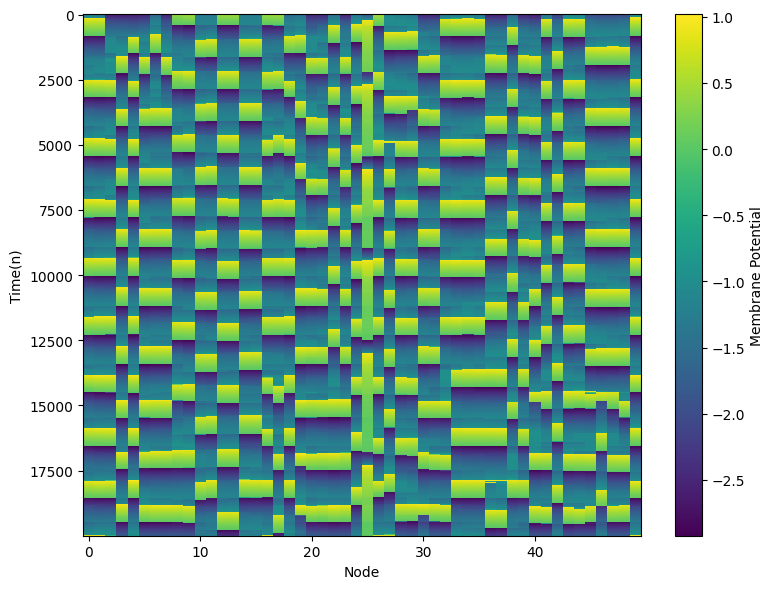

0.03


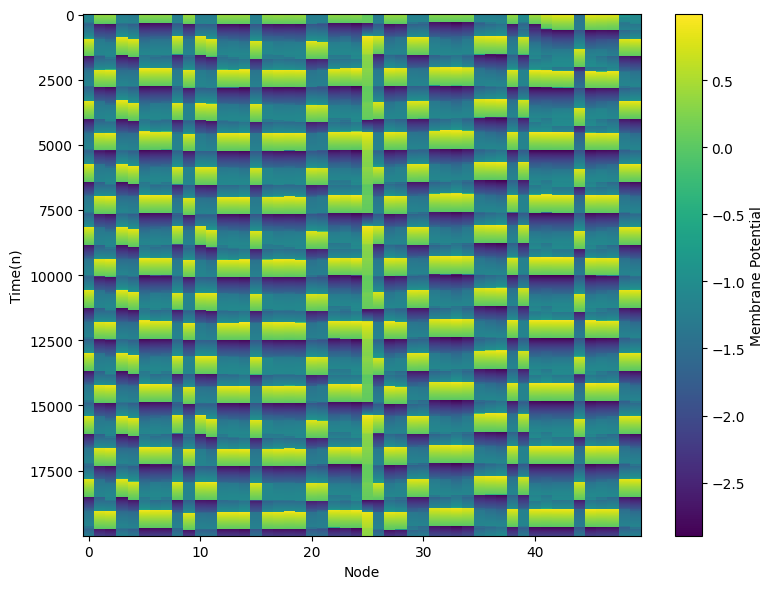

0.04


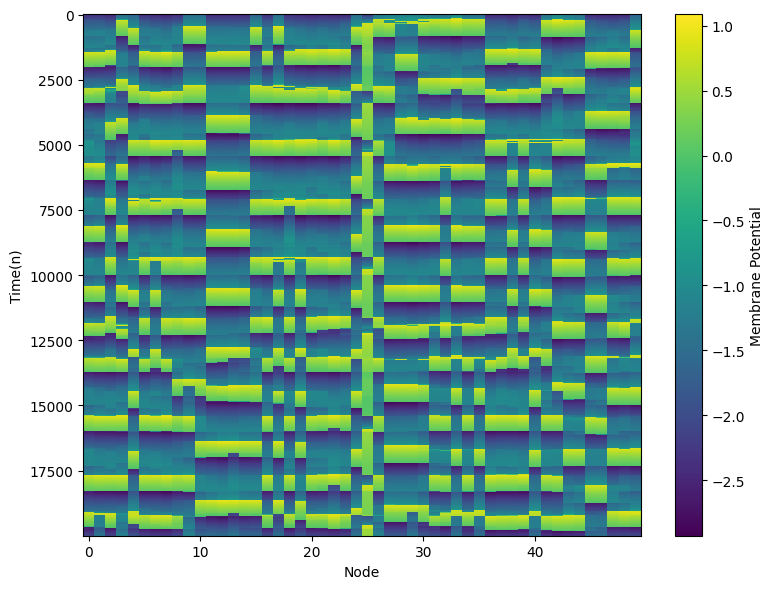

0.05


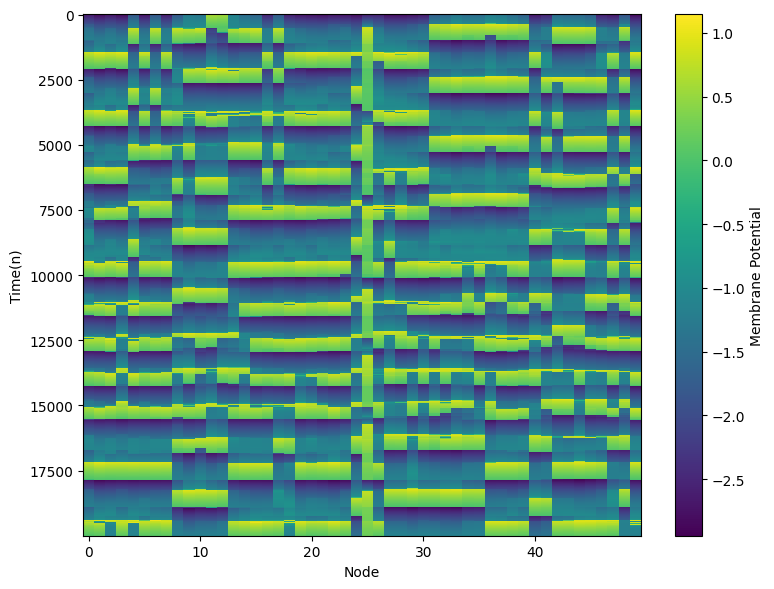

0.06


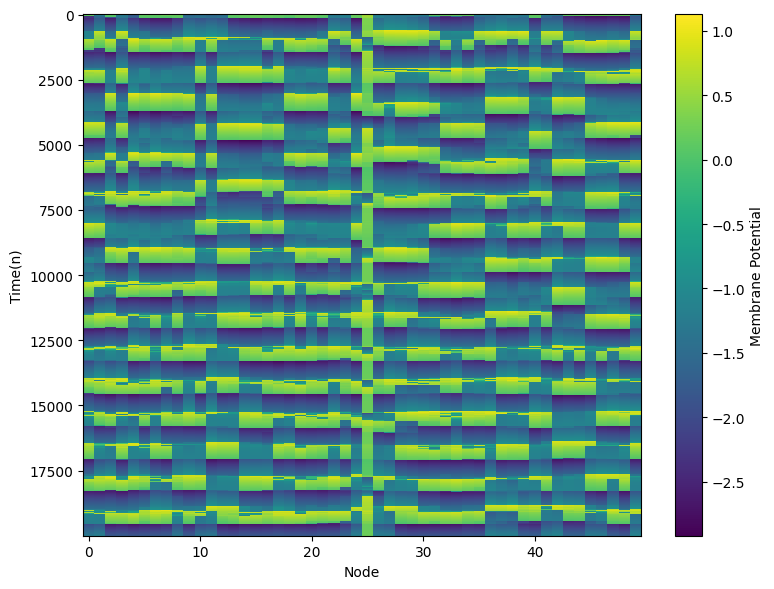

0.07


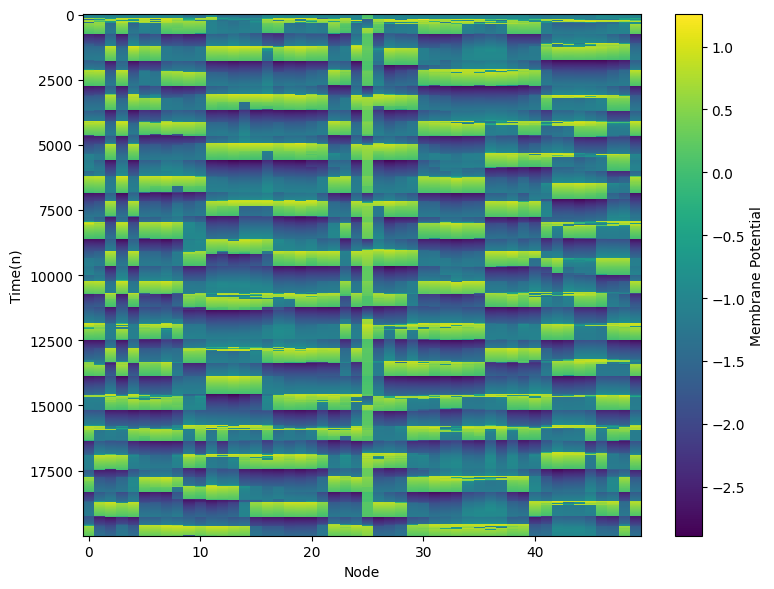

0.08


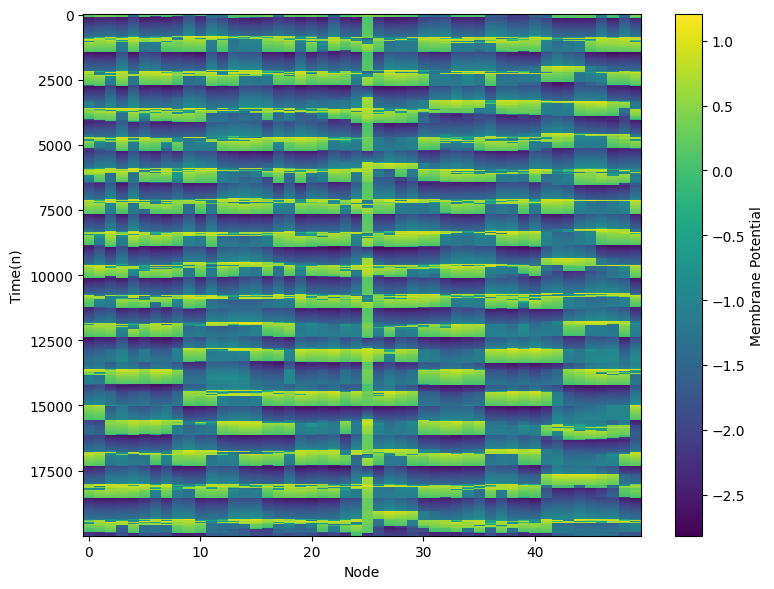

0.09


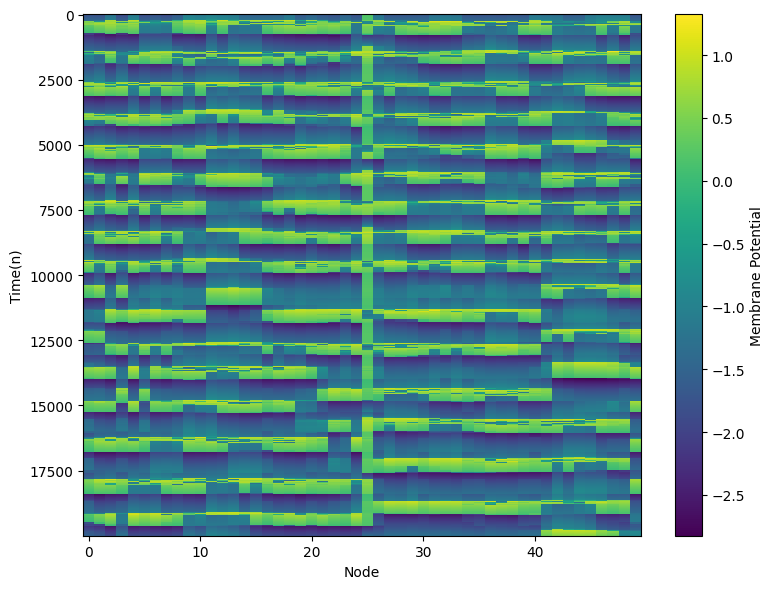

In [ ]:

# cclist = [0]

cclist = [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]



for cc in cclist:
    xlri, ylri =  coupled_rulkov_curr(N, T, mu, alpha, sigma, cc, adja_matrix,pulse_current, pulse_nodes)    

    
    plt.figure(figsize=(8, 6))
    plt.imshow(xlri[10000:, :], aspect='auto', cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Membrane Potential')

    plt.xlabel('Node')
    plt.ylabel('Time(n)')
    # plt.title(f'SWN, Coupling Constant = {cc}', pad=20)  # Adjust pad value as needed

    plt.tight_layout()
    print(cc)
    plt.show()


